<h3 style=text-align:right;>by CS-20102,CS-20104,CS-20110</h3>

<h1 style=color:blue;font-style:italic;font-size:25px><center>Machine Learning CEP</center></h1>       

## Basic Imports

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, average_precision_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import joblib

In [39]:
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

### Read Data

In [40]:
data = pd.read_csv('weatherHistory.csv') # Reading data
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.


### Working with unique values as well reducing dataset

In [41]:
unique_values_counts = data['Summary'].value_counts() # Checking unique values for target output
unique_values_counts

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

## Selecting 3 classes for target variable

#### Can be chaged according to user only in this cell

In [42]:
selected_classes = ["Partly Cloudy", "Mostly Cloudy", "O"] # Selecting 3 classes
reduced_data = data.loc[data['Summary'].isin(selected_classes)] # Stored in variable "reduced_data"
reduced_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
66,2006-04-11 18:00:00.000 +0200,Foggy,rain,10.911111,10.911111,0.86,22.3951,311,2.6565,0,1004.61,Foggy in the evening.
67,2006-04-11 19:00:00.000 +0200,Foggy,rain,8.800000,5.294444,0.99,26.5006,339,2.6565,0,1004.99,Foggy in the evening.
72,2006-04-12 00:00:00.000 +0200,Foggy,rain,8.200000,5.072222,0.96,20.4470,341,3.1073,0,1004.80,Foggy overnight and breezy in the morning.
73,2006-04-12 01:00:00.000 +0200,Foggy,rain,8.177778,4.372222,0.93,27.8691,19,3.2039,0,1004.89,Foggy overnight and breezy in the morning.
126,2006-04-14 06:00:00.000 +0200,Foggy,rain,5.211111,5.211111,0.92,4.7656,178,1.2236,0,1013.40,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96432,2016-09-09 03:00:00.000 +0200,Clear,rain,15.594444,15.594444,0.87,3.2844,41,15.4399,0,1014.52,Partly cloudy starting in the morning.
96433,2016-09-09 04:00:00.000 +0200,Clear,rain,15.011111,15.011111,0.93,3.2039,341,15.8263,0,1014.37,Partly cloudy starting in the morning.
96434,2016-09-09 05:00:00.000 +0200,Clear,rain,15.016667,15.016667,0.90,2.7048,359,14.9569,0,1014.55,Partly cloudy starting in the morning.
96435,2016-09-09 06:00:00.000 +0200,Clear,rain,13.872222,13.872222,0.93,4.7495,0,15.8263,0,1014.66,Partly cloudy starting in the morning.


In [43]:
unique_values_counts = reduced_data['Summary'].value_counts() # Confirming selected classes 
unique_values_counts

Clear                      10890
Foggy                       7148
Windy and Partly Cloudy       67
Name: Summary, dtype: int64

In [44]:
reduced_data.info()
# This information shows that each column has 18105 entries. 
# There are 6 attributes with datatype of 'float64', 2 attributes with datatype of 'int64' and 4 attributes with datatype of 'object'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18105 entries, 66 to 96436
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            18105 non-null  object 
 1   Summary                   18105 non-null  object 
 2   Precip Type               17947 non-null  object 
 3   Temperature (C)           18105 non-null  float64
 4   Apparent Temperature (C)  18105 non-null  float64
 5   Humidity                  18105 non-null  float64
 6   Wind Speed (km/h)         18105 non-null  float64
 7   Wind Bearing (degrees)    18105 non-null  int64  
 8   Visibility (km)           18105 non-null  float64
 9   Loud Cover                18105 non-null  int64  
 10  Pressure (millibars)      18105 non-null  float64
 11  Daily Summary             18105 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.8+ MB


In [45]:
reduced_data['Precip Type'].value_counts() # Checking values for attribute "Precip Type"

rain    13573
snow     4374
Name: Precip Type, dtype: int64

In [46]:
count1 = reduced_data[reduced_data['Precip Type'] == 'rain' ].shape[0] # Counting number of records with "Precip Type" as "rain"
count1

13573

In [47]:
count2 = reduced_data[reduced_data['Precip Type'] == 'snow' ].shape[0] # Counting number of records with "Precip Type" as "snow"
count2

4374

In [48]:
count1 + count2 # So, both of them add upto 17947 which means there 158 null entries in "Precip Type" in "reduced_data"

17947

In [49]:
selected_classes_precip_type = ["rain", "snow"] # Selecting rows with "rain" and "snow" only or discarding null entries
reduced_data2 = reduced_data.loc[reduced_data['Precip Type'].isin(selected_classes_precip_type)] # Storing in "reduced_data2"
reduced_data2

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
66,2006-04-11 18:00:00.000 +0200,Foggy,rain,10.911111,10.911111,0.86,22.3951,311,2.6565,0,1004.61,Foggy in the evening.
67,2006-04-11 19:00:00.000 +0200,Foggy,rain,8.800000,5.294444,0.99,26.5006,339,2.6565,0,1004.99,Foggy in the evening.
72,2006-04-12 00:00:00.000 +0200,Foggy,rain,8.200000,5.072222,0.96,20.4470,341,3.1073,0,1004.80,Foggy overnight and breezy in the morning.
73,2006-04-12 01:00:00.000 +0200,Foggy,rain,8.177778,4.372222,0.93,27.8691,19,3.2039,0,1004.89,Foggy overnight and breezy in the morning.
126,2006-04-14 06:00:00.000 +0200,Foggy,rain,5.211111,5.211111,0.92,4.7656,178,1.2236,0,1013.40,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96432,2016-09-09 03:00:00.000 +0200,Clear,rain,15.594444,15.594444,0.87,3.2844,41,15.4399,0,1014.52,Partly cloudy starting in the morning.
96433,2016-09-09 04:00:00.000 +0200,Clear,rain,15.011111,15.011111,0.93,3.2039,341,15.8263,0,1014.37,Partly cloudy starting in the morning.
96434,2016-09-09 05:00:00.000 +0200,Clear,rain,15.016667,15.016667,0.90,2.7048,359,14.9569,0,1014.55,Partly cloudy starting in the morning.
96435,2016-09-09 06:00:00.000 +0200,Clear,rain,13.872222,13.872222,0.93,4.7495,0,15.8263,0,1014.66,Partly cloudy starting in the morning.


### Encdoing the input variable

In [50]:
# Using dummy encoding scheme
reduced_data2['Precip Type']=reduced_data2['Precip Type'].replace('rain',1) # "rain" as 1
reduced_data2['Precip Type']=reduced_data2['Precip Type'].replace('snow',0) # "snow" as 0
reduced_data2

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
66,2006-04-11 18:00:00.000 +0200,Foggy,1,10.911111,10.911111,0.86,22.3951,311,2.6565,0,1004.61,Foggy in the evening.
67,2006-04-11 19:00:00.000 +0200,Foggy,1,8.800000,5.294444,0.99,26.5006,339,2.6565,0,1004.99,Foggy in the evening.
72,2006-04-12 00:00:00.000 +0200,Foggy,1,8.200000,5.072222,0.96,20.4470,341,3.1073,0,1004.80,Foggy overnight and breezy in the morning.
73,2006-04-12 01:00:00.000 +0200,Foggy,1,8.177778,4.372222,0.93,27.8691,19,3.2039,0,1004.89,Foggy overnight and breezy in the morning.
126,2006-04-14 06:00:00.000 +0200,Foggy,1,5.211111,5.211111,0.92,4.7656,178,1.2236,0,1013.40,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96432,2016-09-09 03:00:00.000 +0200,Clear,1,15.594444,15.594444,0.87,3.2844,41,15.4399,0,1014.52,Partly cloudy starting in the morning.
96433,2016-09-09 04:00:00.000 +0200,Clear,1,15.011111,15.011111,0.93,3.2039,341,15.8263,0,1014.37,Partly cloudy starting in the morning.
96434,2016-09-09 05:00:00.000 +0200,Clear,1,15.016667,15.016667,0.90,2.7048,359,14.9569,0,1014.55,Partly cloudy starting in the morning.
96435,2016-09-09 06:00:00.000 +0200,Clear,1,13.872222,13.872222,0.93,4.7495,0,15.8263,0,1014.66,Partly cloudy starting in the morning.


### Saving then reading the reduced dataset

In [51]:
# Making a csv file for "reduced_data2"
reduced_data2.to_csv('preprocessedWeatherHistory.csv', index=False) # Naming it as "preprocessedWeatherHistory.csv"

In [52]:
data = pd.read_csv('preprocessedWeatherHistory.csv') # Reading the data
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-11 18:00:00.000 +0200,Foggy,1,10.911111,10.911111,0.86,22.3951,311,2.6565,0,1004.61,Foggy in the evening.
1,2006-04-11 19:00:00.000 +0200,Foggy,1,8.800000,5.294444,0.99,26.5006,339,2.6565,0,1004.99,Foggy in the evening.
2,2006-04-12 00:00:00.000 +0200,Foggy,1,8.200000,5.072222,0.96,20.4470,341,3.1073,0,1004.80,Foggy overnight and breezy in the morning.
3,2006-04-12 01:00:00.000 +0200,Foggy,1,8.177778,4.372222,0.93,27.8691,19,3.2039,0,1004.89,Foggy overnight and breezy in the morning.
4,2006-04-14 06:00:00.000 +0200,Foggy,1,5.211111,5.211111,0.92,4.7656,178,1.2236,0,1013.40,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
17942,2016-09-09 03:00:00.000 +0200,Clear,1,15.594444,15.594444,0.87,3.2844,41,15.4399,0,1014.52,Partly cloudy starting in the morning.
17943,2016-09-09 04:00:00.000 +0200,Clear,1,15.011111,15.011111,0.93,3.2039,341,15.8263,0,1014.37,Partly cloudy starting in the morning.
17944,2016-09-09 05:00:00.000 +0200,Clear,1,15.016667,15.016667,0.90,2.7048,359,14.9569,0,1014.55,Partly cloudy starting in the morning.
17945,2016-09-09 06:00:00.000 +0200,Clear,1,13.872222,13.872222,0.93,4.7495,0,15.8263,0,1014.66,Partly cloudy starting in the morning.


<h1><center>Training the Models</center></h1>       

## Parametric Model (Logistic Regression)

### (1) test size set to 20% and regularization strength to 0.5

In [53]:
# Applying parametric algorithm "Logistic Regression" with test size 20%


# Spliting the data into input features (x) and target variable (y)
x = data[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', "Wind Bearing (degrees)", 'Visibility (km)', 'Pressure (millibars)']]
y = data['Summary']

# Spliting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

# Scaling the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training model on Logistic Regression
model_11 = LogisticRegression(penalty='l2', C=0.5, solver='lbfgs', max_iter=1000) # Using penalty 'l2' with available solver 'lbfgs'
model_11.fit(x_train_scaled, y_train)

# Predicting the target variable for the test set
y_pred = model_11.predict(x_test_scaled)

# Evaluating the model
accuracy_11 = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy_11 * 100, 3)
print(f'Accuracy Score: {accuracy_percentage}%')

Accuracy Score: 97.744%


### (2) test size set to 30% and regularization strength to 1.0

In [54]:
# Applying parametric algorithm "Logistic Regression" with test size 30%

# Spliting the data into input features (x) and target variable (y)
x = data[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', "Wind Bearing (degrees)", 'Visibility (km)', 'Pressure (millibars)']]
y = data['Summary']

# Spliting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 

# Scaling the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training model on Logistic Regression
model_12 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000) # Using penalty 'l2' with available solver 'lbfgs'
model_12.fit(x_train_scaled, y_train)

# Predicting the target variable for the test set
y_pred = model_12.predict(x_test_scaled)

# Evaluating the model
accuracy_12 = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy_12 * 100, 3)
print(f'Accuracy Score: {accuracy_percentage}%')

Accuracy Score: 97.939%


### (3) test size set to 20% and regularization strength to 1.0

In [55]:
# Applying parametric algorithm "Logistic Regression" with test size 20% and C=1.0

# Spliting the data into input features (x) and target variable (y)
x = data[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', "Wind Bearing (degrees)", 'Visibility (km)', 'Pressure (millibars)']]
y = data['Summary']

# Spliting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

# Scaling the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training model on Logistic Regression
model_13 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000) # Using penalty 'l2' with available solver 'lbfgs'
model_13.fit(x_train_scaled, y_train)

# Predicting the target variable for the test set
y_pred = model_13.predict(x_test_scaled)

# Evaluating the model
accuracy_13 = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy_13 * 100, 3)
print(f'Accuracy Score: {accuracy_percentage}%')

Accuracy Score: 97.883%


## Non-parametric Model (Random Forest)

### (1) test size to 30% and n_estimator to 100

In [56]:
# Applying non parametric algorithm "Random Forest" with test size 20%

# Spliting the data into input features (x) and target variable (y)
x = data[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = data['Summary']

# Spliting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 

# Scaling the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training the Random Forest classifier with specified parameters
model_21 = RandomForestClassifier(n_estimators=100, random_state=0)
model_21.fit(x_train_scaled, y_train)

# Predicting the target variable for the test set
y_pred = model_21.predict(x_test_scaled)

# Evaluating the model
accuracy_21 = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy_21 * 100, 3)
print(f'Accuracy Score: {accuracy_percentage}%')

Accuracy Score: 99.814%


### (2) test size set to 20% and n_estimator to 150

In [57]:
# Applying non parametric algorithm "Random Forest" with test size 20%

# Spliting the data into input features (x) and target variable (y)
X = data[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = data['Summary']

# Spliting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

# Scaling the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training the Random Forest classifier with specified parameters
model_22 = RandomForestClassifier(n_estimators=150, random_state=0)
model_22.fit(x_train_scaled, y_train)

# Predicting the target variable for the test set
y_pred = model_22.predict(x_test_scaled)

# Evaluating the model
accuracy_22 = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy_22 * 100, 3)
print(f'Accuracy Score: {accuracy_percentage}%')

Accuracy Score: 99.916%


### (3) test size set to 10% and n_estimator to 100

In [58]:
# Applying non parametric algorithm "Random Forest" with test size 10%

# Spliting the data into input features (X) and target variable (y)
X = data[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = data['Summary']

# Spliting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Scaling the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training the Random Forest classifier with specified parameters
model_23 = RandomForestClassifier(n_estimators=100, random_state=0)
model_23.fit(x_train_scaled, y_train)

# Predicting the target variable for the test set
y_pred = model_23.predict(x_test_scaled)

# Evaluating the model
accuracy_23 = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy_23 * 100, 3)
print(f'Accuracy Score: {accuracy_percentage}%')

Accuracy Score: 99.944%


## Neural Network (Multi-Layer Perceptron)

### (1) test size to 20% and epochs to 20

In [59]:
# Applying ANN algorithm "Multi-Layer Perceptron(MLP)" with test size 20% and 20 epochsmodel_31

# Spliting the data into input features (x) and target variable (y)
x = data[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = data['Summary']

# Performing label encoding on the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Spliting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Performing feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initializing the MLP model
model_31 = Sequential()

# Adding input layer and hidden layers
model_31.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
model_31.add(Dense(units=64, activation='relu'))

# Adding output layer
model_31.add(Dense(units=3, activation='softmax'))  # Set units to 3 for 3 unique classes

# Compiling the model
model_31.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model_31.fit(x_train, y_train, epochs=20, batch_size=32)

# Predicting the target variable for the test set
y_pred_prob = model_31.predict(x_test)
y_pred = y_pred_prob.argmax(axis=1)

# Decoding the predicted classes
y_pred = le.inverse_transform(y_pred.astype(int))

# Decoding the true classes
y_test = le.inverse_transform(y_test)

# Evaluating the model
accuracy_31 = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy_31 * 100, 3)
print(f'Accuracy Score: {accuracy_percentage}%')

Epoch 1/20
449/449 [==============================] - 5s 3ms/step - loss: 0.1675 - accuracy: 0.9480
Epoch 2/20
449/449 [==============================] - 1s 3ms/step - loss: 0.0554 - accuracy: 0.9829
Epoch 3/20
449/449 [==============================] - 1s 3ms/step - loss: 0.0448 - accuracy: 0.9878
Epoch 4/20
449/449 [==============================] - 2s 5ms/step - loss: 0.0395 - accuracy: 0.9890
Epoch 5/20
449/449 [==============================] - 3s 7ms/step - loss: 0.0354 - accuracy: 0.9898
Epoch 6/20
449/449 [==============================] - 2s 4ms/step - loss: 0.0323 - accuracy: 0.9907
Epoch 7/20
449/449 [==============================] - 2s 4ms/step - loss: 0.0289 - accuracy: 0.9917
Epoch 8/20
449/449 [==============================] - 2s 4ms/step - loss: 0.0274 - accuracy: 0.9927
Epoch 9/20
449/449 [==============================] - 2s 3ms/step - loss: 0.0252 - accuracy: 0.9928
Epoch 10/20
449/449 [==============================] - 2s 5ms/step - loss: 0.0252 - accuracy: 0.9929

### (2) test size to 20% and epochs to 15

In [60]:
# Applying ANN algorithm "Multi-Layer Perceptron(MLP)" with test size 20% and 15 epochsmodel_32

# Spliting the data into input features (x) and target variable (y)
x = data[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = data['Summary']

# Performing label encoding on the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Spliting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Performing feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initializing the MLP model
model_32 = Sequential()

# Adding input layer and hidden layers
model_32.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
model_32.add(Dense(units=64, activation='relu'))

# Adding output layer
model_32.add(Dense(units=3, activation='softmax'))  # Set units to 3 for 3 unique classes

# Compiling the model
model_32.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model_32.fit(x_train, y_train, epochs=15, batch_size=32)

# Predicting the target variable for the test set
y_pred_prob = model_32.predict(x_test)
y_pred = y_pred_prob.argmax(axis=1)

# Decoding the predicted classes
y_pred = le.inverse_transform(y_pred.astype(int))

# Decoding the true classes
y_test = le.inverse_transform(y_test)

# Evaluating the model
accuracy_32 = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy_32 * 100, 3)
print(f'Accuracy Score: {accuracy_percentage}%')

Epoch 1/15
449/449 [==============================] - 4s 4ms/step - loss: 0.1433 - accuracy: 0.9572
Epoch 2/15
449/449 [==============================] - 2s 4ms/step - loss: 0.0548 - accuracy: 0.9833
Epoch 3/15
449/449 [==============================] - 2s 4ms/step - loss: 0.0455 - accuracy: 0.9877
Epoch 4/15
449/449 [==============================] - 2s 4ms/step - loss: 0.0396 - accuracy: 0.9888
Epoch 5/15
449/449 [==============================] - 2s 5ms/step - loss: 0.0350 - accuracy: 0.9900
Epoch 6/15
449/449 [==============================] - 2s 4ms/step - loss: 0.0323 - accuracy: 0.9908
Epoch 7/15
449/449 [==============================] - 2s 4ms/step - loss: 0.0292 - accuracy: 0.9919
Epoch 8/15
449/449 [==============================] - 2s 5ms/step - loss: 0.0285 - accuracy: 0.9915
Epoch 9/15
449/449 [==============================] - 2s 5ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 10/15
449/449 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.9931

### (3) test size to 20% and epochs to 10

In [61]:
# Applying ANN algorithm "Multi-Layer Perceptron(MLP)" with test size 20% and 10 epochsmodel_33

# Spliting the data into input features (x) and target variable (y)
x = data[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y = data['Summary']

# Performing label encoding on the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Spliting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Performing feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initializing the MLP model
model_33 = Sequential()

# Adding input layer and hidden layers
model_33.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
model_33.add(Dense(units=64, activation='relu'))

# Adding output layer
model_33.add(Dense(units=3, activation='softmax'))  # Set units to 3 for 3 unique classes

# Compiling the model
model_33.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model_33.fit(x_train, y_train, epochs=10, batch_size=32)

# Predicting the target variable for the test set
y_pred_prob = model_33.predict(x_test)
y_pred = y_pred_prob.argmax(axis=1)

# Decoding the predicted classes
y_pred = le.inverse_transform(y_pred.astype(int))

# Decoding the true classes
y_test = le.inverse_transform(y_test)

# Evaluating the model
accuracy_33 = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy_33 * 100, 3)
print(f'Accuracy Score: {accuracy_percentage}%')

Epoch 1/10
449/449 [==============================] - 3s 3ms/step - loss: 0.1597 - accuracy: 0.9479
Epoch 2/10
449/449 [==============================] - 1s 3ms/step - loss: 0.0562 - accuracy: 0.9834
Epoch 3/10
449/449 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.9870
Epoch 4/10
449/449 [==============================] - 2s 4ms/step - loss: 0.0406 - accuracy: 0.9882
Epoch 5/10
449/449 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9899
Epoch 6/10
449/449 [==============================] - 2s 5ms/step - loss: 0.0334 - accuracy: 0.9909
Epoch 7/10
449/449 [==============================] - 2s 4ms/step - loss: 0.0311 - accuracy: 0.9912
Epoch 8/10
449/449 [==============================] - 2s 3ms/step - loss: 0.0299 - accuracy: 0.9914
Epoch 9/10
449/449 [==============================] - 2s 4ms/step - loss: 0.0258 - accuracy: 0.9929
Epoch 10/10
113/113 [==============================] - 0s 2ms/step
Accuracy Score: 99.192%


# Make New Predictions with Trained Models

In [62]:
# Prepare the new data
new_data = [[1, 8.6889, 8.6889, 0.93, 1.4329, 290, 5.8443, 1012.96]]

# Convert new_data to a DataFrame
new_data_df = pd.DataFrame(new_data, columns=['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'])
new_data_scaled = scaler.transform(new_data_df)

# Make predictions on the new data
new_data_predictions = model_11.predict(new_data_scaled)

# Print the predicted target variable values
print(new_data_predictions)


['Clear']


In [63]:
# Prepare the new data
new_data = [[1, 10.911, 10.911, 0.86, 22.3951, 311, 2.6565, 1004.61]]

# Convert new_data to a DataFrame
new_data_df = pd.DataFrame(new_data, columns=['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'])

# Predict using the trained model
external_pred_prob = model_33.predict(new_data_df)
external_pred = external_pred_prob.argmax(axis=1)

# Decode the predicted classes
external_pred = le.inverse_transform(external_pred.astype(int))

# Print the predictions
print("Predictions for the external data:")
print(external_pred)

1/1 [==============================] - 0s 148ms/step
Predictions for the external data:
['Clear']


In [64]:
def Predict(a,b,c,d,e,f,g,h):
    new_data=[[a,b,c,d,e,f,g,h]]
    new_data_df = pd.DataFrame(new_data, columns=['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'])
    
    #logistic regression
    new_data_scaled = scaler.transform(new_data_df)

    # Make predictions on the new data
    new_data_predictions = model_11.predict(new_data_scaled)
    print('According to Logistic Regression first model, summary is',model_11.predict(scaler.transform(new_data_df)))
    print('According to Logistic Regression second model, summary is',model_12.predict(scaler.transform(new_data_df)))
    print('According to Logistic Regression third model, summary is',model_13.predict(scaler.transform(new_data_df)))
    #random forest
    print('According to Random Forest first model, summary is',model_21.predict(scaler.transform(new_data_df)))
    print('According to Random Forest second model, summary is',model_22.predict(scaler.transform(new_data_df)))
    print('According to Random Forest third model, summary is',model_23.predict(scaler.transform(new_data_df)))
    #multi-layer perceptron
    new_data_df2 = scaler.transform(new_data_df)
    external_pred_prob = model_31.predict(new_data_df2)
    external_pred = external_pred_prob.argmax(axis=1)
    external_pred = le.inverse_transform(external_pred.astype(int))
    print('According to Multi Layer Perceptron first model, summary is',external_pred)
    
    new_data_df2 = scaler.transform(new_data_df)
    external_pred_prob = model_32.predict(new_data_df2)
    external_pred = external_pred_prob.argmax(axis=1)
    external_pred = le.inverse_transform(external_pred.astype(int))
    print('According to Multi Layer Perceptron second model, summary is',external_pred)
    
    new_data_df2 = scaler.transform(new_data_df)
    external_pred_prob = model_33.predict(new_data_df2)
    external_pred = external_pred_prob.argmax(axis=1)
    external_pred = le.inverse_transform(external_pred.astype(int))
    print('According to Multi Layer Perceptron third model, summary is',external_pred)

In [65]:
# "rain" as 1
# "snow" as 0
def predNew():
    while True:
        print("==== Predict with new model ====")
        print("choose from options:  \n1) rain\n2) snow")
        choice = int(input("enter number: "))
        if choice ==1:
            precip=1
            print("Rain selected!!")
            break
        elif choice == 2:
            precip=0
            print("Snow selected!!")
            break
        else:
            print("Choose valid option!!!")
    temperature = float(input("Enter Temperature in celsius: "))
    apparent = float(input("Enter Apparent Temperature in celsius: "))
    humidity = float(input("Enter Humidity: "))
    windspeed = float(input("Enter Windspeed in km/h: "))
    windbearing = float(input("Enter Windbearing in degrees: "))
    visibility = float(input("Enter Visibility in km: "))
    pressure = float(input("Enter Pressure in millibars: "))
    Predict(precip,temperature,apparent,humidity,windspeed,windbearing,visibility,pressure)


## Enter test data

In [67]:
predNew()

==== Predict with new model ====
choose from options:  
1) rain
2) snow
enter number: 1
Rain selected!!
Enter Temperature in celsius: 14
Enter Apparent Temperature in celsius: 15.6
Enter Humidity: 0.2
Enter Windspeed in km/h: 67
Enter Windbearing in degrees: 98
Enter Visibility in km: 0.3
Enter Pressure in millibars: 1004.9
According to Logistic Regression first model, summary is ['Windy and Partly Cloudy']
According to Logistic Regression second model, summary is ['Windy and Partly Cloudy']
According to Logistic Regression third model, summary is ['Windy and Partly Cloudy']
According to Random Forest first model, summary is ['Foggy']
According to Random Forest second model, summary is ['Foggy']
According to Random Forest third model, summary is ['Foggy']
1/1 [==============================] - 0s 53ms/step
According to Multi Layer Perceptron first model, summary is ['Windy and Partly Cloudy']
1/1 [==============================] - 0s 50ms/step
According to Multi Layer Perceptron second

## Saving the built models for later use

In [68]:
 joblib.dump(model_11,"logistic_model_1")
joblib.dump(model_12,"logistic_model_2")
joblib.dump(model_13,"logistic_model_3")
joblib.dump(model_21,"random_forest_1")
joblib.dump(model_22,"random_forest_2")
joblib.dump(model_23,"random_forest_3")
joblib.dump(model_31,"neural_network_1")
joblib.dump(model_32,"neural_network_2")
joblib.dump(model_33,"neural_network_3")

['neural_network_3']

## Model names and Accuracies for Comparison

In [69]:
# Names and accuracy scores of the 9 models
model_names = ['logistic_1', 'logistic_2', 'logistic_3', 'rf_1', 'rf_2', 'rf_3', 'nn_1', 'nn_2', 'nn_3']
accuracy_scores = [accuracy_11, accuracy_12, accuracy_13, accuracy_21, accuracy_22, accuracy_23, accuracy_31, accuracy_32,accuracy_33]

## Comparing Accuracies Tabularly

In [70]:
# Create a dataframe to display the accuracy scores
df = pd.DataFrame({'Models': model_names, 'Accuracy Scores': accuracy_scores})

# Display the dataframe
print(df)

       Models  Accuracy Scores
0  logistic_1         0.977437
1  logistic_2         0.979387
2  logistic_3         0.978830
3        rf_1         0.998143
4        rf_2         0.999164
5        rf_3         0.999443
6        nn_1         0.994986
7        nn_2         0.993593
8        nn_3         0.991922


## Comparing Accuracies using Bar Plot

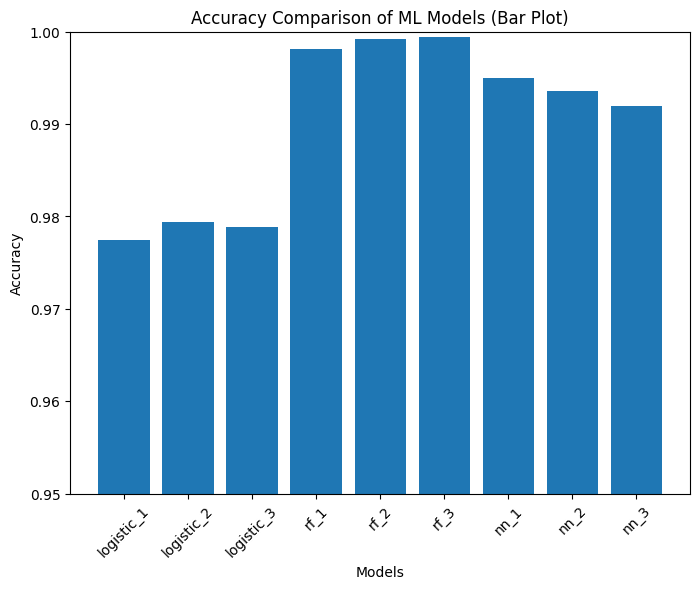

In [71]:
# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of ML Models (Bar Plot)')
plt.ylim([0.95, 1])  # Set the y-axis limits from 0.95 to 1
plt.xticks(rotation=45)
plt.show()

## Comparing Accuracies using Line Plot

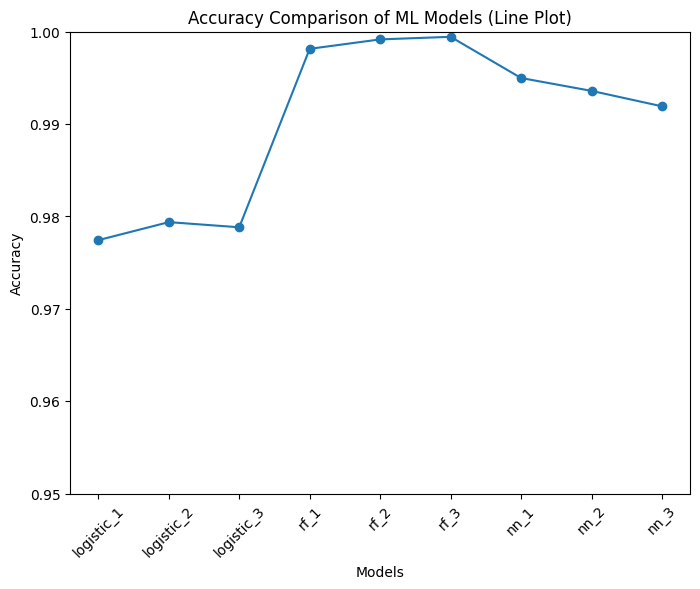

In [72]:
# Line plot
plt.figure(figsize=(8, 6))
plt.plot(model_names, accuracy_scores, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of ML Models (Line Plot)')
plt.ylim([0.95, 1])  # Set the y-axis limits from 0.95 to 1
plt.xticks(rotation=45)
plt.show()

## Comparing Accuracies using Scatter Plot

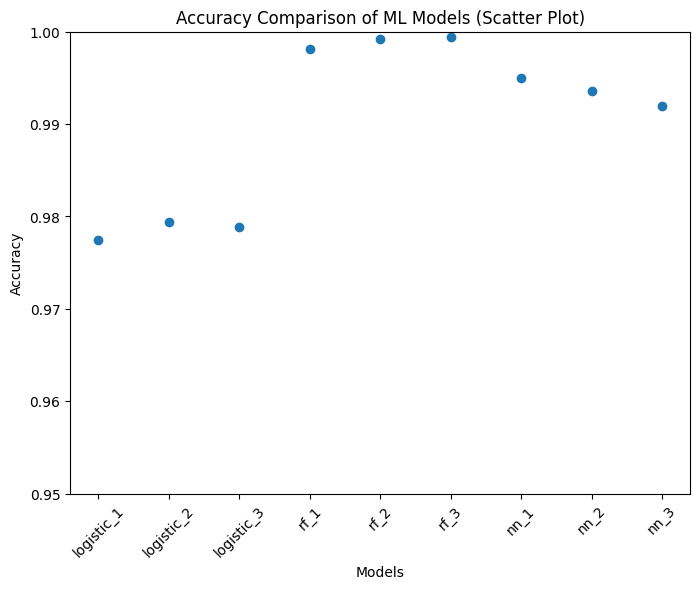

In [73]:
# Scatter plot
x = np.arange(len(model_names))
plt.figure(figsize=(8, 6))
plt.scatter(x, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of ML Models (Scatter Plot)')
plt.ylim([0.95, 1])  # Set the y-axis limits from 0.95 to 1
plt.xticks(x, model_names, rotation=45)
plt.show()

## Dev and Test Set to select Best Model

In [74]:
# Split the data into train, development, and test sets
X_train, X_dev_test, y_train, y_dev_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev_test, y_dev_test, test_size=0.5, random_state=42)

# Define the algorithms and their corresponding models
algorithms = {
    'Logistic Regression': {
        'Logistic_Resgression_1': LogisticRegression(penalty='l2', C=0.5, solver='lbfgs', max_iter=1000),
        'Logistic_Resgression_2': LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000),
        'Logistic_Resgression_3': LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
    },
    'Random Forest': {
        'Random_Forest_1': RandomForestClassifier(n_estimators=100, random_state=0),
        'Random_Forest_2': RandomForestClassifier(n_estimators=200, random_state=0),
        'Random_Forest_3': RandomForestClassifier(n_estimators=100, random_state=0)
    },
    'MLP': {
        'MLP_1': MLPClassifier(),
        'MLP_2': MLPClassifier(),
        'MLP_3': MLPClassifier()
    }
}

# Train and evaluate the models on the development set
best_model = None
best_model_accuracy = 0.0

for algorithm, models in algorithms.items():
    print(f"Evaluating models for {algorithm}")
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_dev)
        accuracy = accuracy_score(y_dev, y_pred)
        print(f"{model_name} Accuracy on Development Set: {accuracy * 100}%")
        
        if accuracy > best_model_accuracy:
            best_model_accuracy = accuracy
            best_model = model

# Hyperparameter tuning using GridSearchCV on the best model
param_grid = {
    
}

grid_search = GridSearchCV(best_model, param_grid, cv=5)
grid_search.fit(X_dev, y_dev)

best_model = grid_search.best_estimator_
print("Best model", best_model)
# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of Best Model on Test Set: {test_accuracy * 100}%')


Evaluating models for Logistic Regression
Logistic_Resgression_1 Accuracy on Development Set: 97.5854383358098%
Logistic_Resgression_2 Accuracy on Development Set: 97.5111441307578%
Logistic_Resgression_3 Accuracy on Development Set: 97.5111441307578%
Evaluating models for Random Forest
Random_Forest_1 Accuracy on Development Set: 99.962852897474%
Random_Forest_2 Accuracy on Development Set: 99.962852897474%
Random_Forest_3 Accuracy on Development Set: 99.962852897474%
Evaluating models for MLP
MLP_1 Accuracy on Development Set: 97.77117384843982%
MLP_2 Accuracy on Development Set: 98.47696879643388%
MLP_3 Accuracy on Development Set: 98.6627043090639%
Best model RandomForestClassifier(random_state=0)
Accuracy of Best Model on Test Set: 99.48013367991088%


## Calculating f1 scores

In [75]:
model_names = ['logistic_1', 'logistic_2', 'logistic_3', 'rf_1', 'rf_2', 'rf_3', 'nn_1', 'nn_2', 'nn_3']
models = [
    LogisticRegression(penalty='l2', C=0.5, solver='lbfgs', max_iter=1000),  
    LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000),  
    LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000),  
    RandomForestClassifier(n_estimators=100, random_state=0),  
    RandomForestClassifier(n_estimators=150, random_state=0),  
    RandomForestClassifier(n_estimators=100, random_state=0),  
    Sequential([Dense(units=64, activation='relu', input_dim=8),
                Dense(units=64, activation='relu'),
                Dense(units=3, activation='softmax')]),  
    Sequential([Dense(units=64, activation='relu', input_dim=8),
                Dense(units=64, activation='relu'),
                Dense(units=3, activation='softmax')]),  
    Sequential([Dense(units=64, activation='relu', input_dim=8),
                Dense(units=64, activation='relu'),
                Dense(units=3, activation='softmax')])  
]

# List to store F1 scores for each model
f1_scores = []


# Creating separate DataFrames for each model
dfs = []

# Looping through each model
for model, model_name in zip(models, model_names):
    # Copying the original DataFrame to create a separate DataFrame for each model
    df = data.copy()
    x = df[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', "Wind Bearing (degrees)", 'Visibility (km)', 'Pressure (millibars)']]
    y = df['Summary']

    # Spliting the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    # Feature scaling if applicable (except for deep learning models)
    if not isinstance(model, Sequential):
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
    else:
        x_train_scaled, x_test_scaled = x_train, x_test

    # Training the model
    if not isinstance(model, Sequential):
        model.fit(x_train_scaled, y_train)
    else:
        # For deep learning models, encoding labels and compile the model before training
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(x_train_scaled, y_train_encoded, epochs=20, batch_size=32)

    # Predicting labels for the test data
    if not isinstance(model, Sequential):
        y_pred = model.predict(x_test_scaled)
        # For deep learning models, decoding the labels
        if isinstance(model, Sequential):
            y_pred = model.predict(x_test_scaled)
            y_pred = y_pred.argmax(axis=1)
            y_pred = le.inverse_transform(y_pred.astype(int))
    else:
        y_pred_prob = model.predict(x_test_scaled)
        y_pred = y_pred_prob.argmax(axis=1)
        y_pred = le.inverse_transform(y_pred.astype(int))

    # Calculating the F1 scores
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Appending F1 score to the list
    f1_scores.append(f1)

    # Printing the F1 score for the current model
    print(f'{model_name} - F1 Score:', f1)

    # Appending the DataFrame to the list
    dfs.append(df)

# Creating a DataFrame to display the F1 scores
f1_scores_df = pd.DataFrame({'Models': model_names, 'F1 Scores': f1_scores})
print(f1_scores_df)


logistic_1 - F1 Score: 0.9774954367588542
logistic_2 - F1 Score: 0.9788791948546248
logistic_3 - F1 Score: 0.9788791948546248
rf_1 - F1 Score: 0.9991644924691107
rf_2 - F1 Score: 0.9991644924691107
rf_3 - F1 Score: 0.9991644924691107
Epoch 1/20
449/449 [==============================] - 3s 4ms/step - loss: 1.4190 - accuracy: 0.7990
Epoch 2/20
449/449 [==============================] - 3s 6ms/step - loss: 0.2310 - accuracy: 0.9301
Epoch 3/20
449/449 [==============================] - 1s 3ms/step - loss: 0.2536 - accuracy: 0.9287
Epoch 4/20
449/449 [==============================] - 1s 3ms/step - loss: 0.2595 - accuracy: 0.9356
Epoch 5/20
449/449 [==============================] - 1s 3ms/step - loss: 0.3102 - accuracy: 0.9229
Epoch 6/20
449/449 [==============================] - 1s 3ms/step - loss: 0.1908 - accuracy: 0.9545
Epoch 7/20
449/449 [==============================] - 1s 3ms/step - loss: 0.2264 - accuracy: 0.9552
Epoch 8/20
449/449 [==============================] - 1s 3ms/step 

## Plotting f1 scores

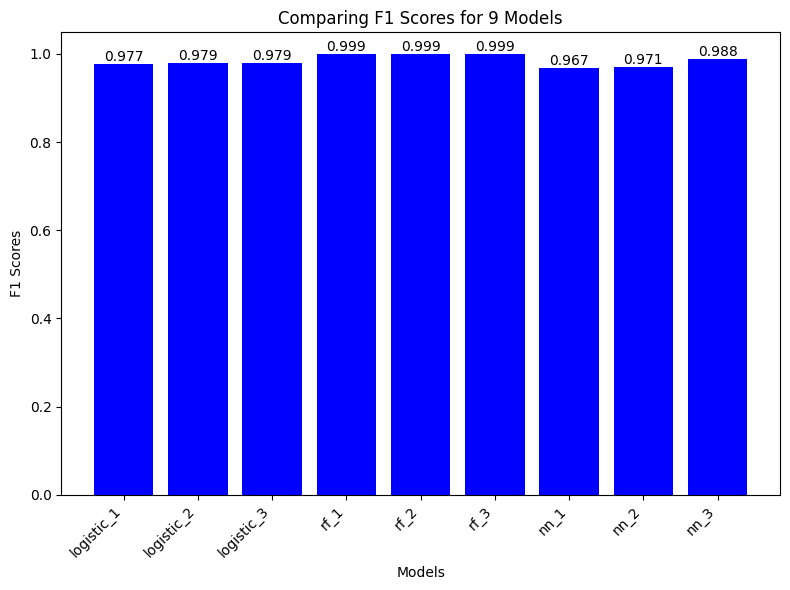

In [76]:
model_names = ['logistic_1', 'logistic_2', 'logistic_3', 'rf_1', 'rf_2', 'rf_3', 'nn_1', 'nn_2', 'nn_3']

# Rounding each value to 3 decimal places
f1_scores_rounded = [round(num, 3) for num in f1_scores]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, f1_scores_rounded, color='blue')
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.title('Comparing F1 Scores for 9 Models')
plt.xticks(rotation=45, ha='right')

# Displaying the F1 score on top of each bar
for i, v in enumerate(f1_scores_rounded):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Making Confusion Matrices

logistic_1 - Accuracy: 0.9774373259052925
logistic_1 - F1 Score: 0.9774954367588542
logistic_1 - Confusion Matrix:
[[2084   64    0]
 [  17 1409    0]
 [   0    0   16]]


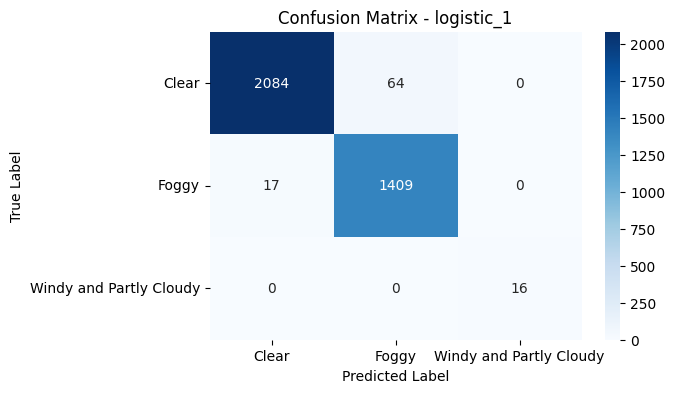

logistic_2 - Accuracy: 0.9788300835654596
logistic_2 - F1 Score: 0.9788791948546248
logistic_2 - Confusion Matrix:
[[2089   59    0]
 [  17 1409    0]
 [   0    0   16]]


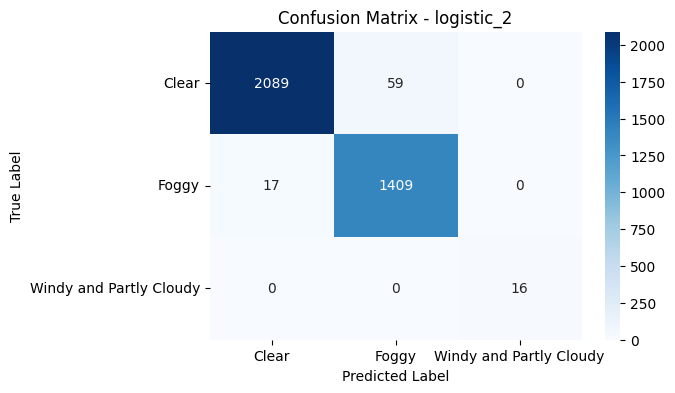

logistic_3 - Accuracy: 0.9788300835654596
logistic_3 - F1 Score: 0.9788791948546248
logistic_3 - Confusion Matrix:
[[2089   59    0]
 [  17 1409    0]
 [   0    0   16]]


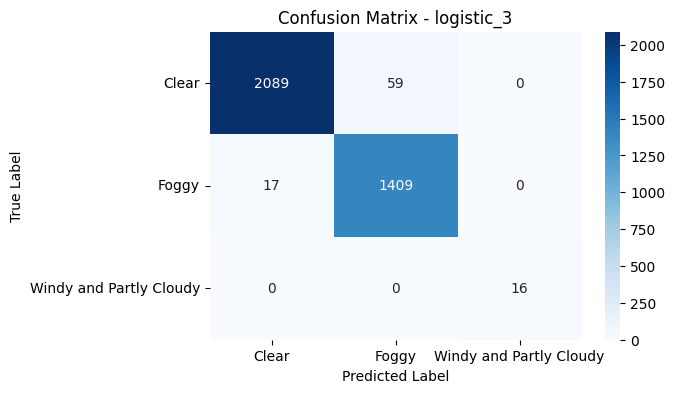

rf_1 - Accuracy: 0.9991643454038998
rf_1 - F1 Score: 0.9991644924691107
rf_1 - Confusion Matrix:
[[2145    3    0]
 [   0 1426    0]
 [   0    0   16]]


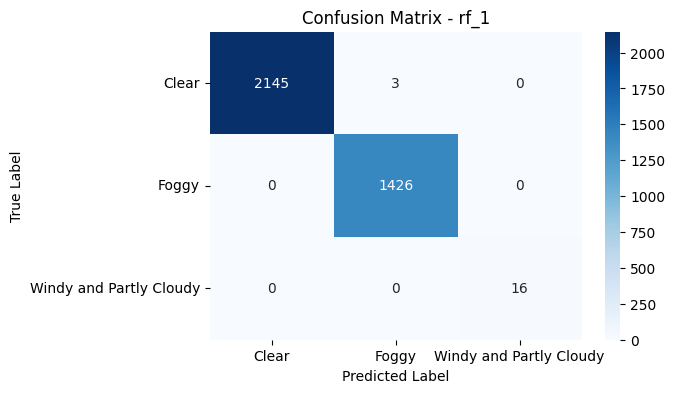

rf_2 - Accuracy: 0.9991643454038998
rf_2 - F1 Score: 0.9991644924691107
rf_2 - Confusion Matrix:
[[2145    3    0]
 [   0 1426    0]
 [   0    0   16]]


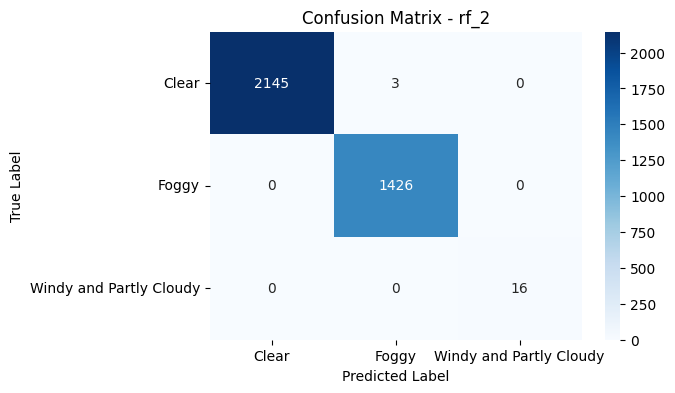

rf_3 - Accuracy: 0.9991643454038998
rf_3 - F1 Score: 0.9991644924691107
rf_3 - Confusion Matrix:
[[2145    3    0]
 [   0 1426    0]
 [   0    0   16]]


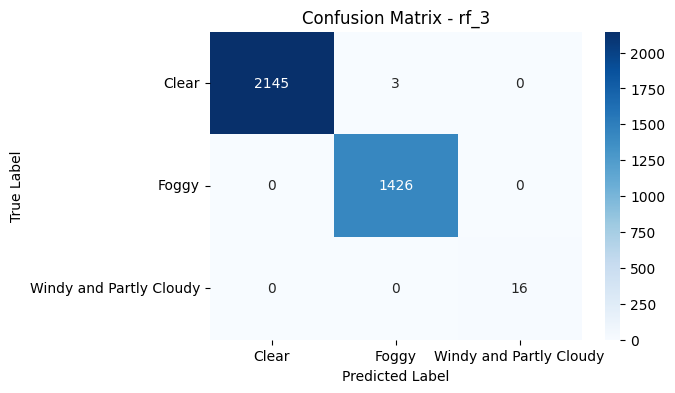

Epoch 1/20
449/449 [==============================] - 4s 4ms/step - loss: 1.0281 - accuracy: 0.7804
Epoch 2/20
449/449 [==============================] - 2s 5ms/step - loss: 0.1782 - accuracy: 0.9417
Epoch 3/20
449/449 [==============================] - 2s 4ms/step - loss: 0.1563 - accuracy: 0.9472
Epoch 4/20
449/449 [==============================] - 3s 6ms/step - loss: 0.1664 - accuracy: 0.9496
Epoch 5/20
449/449 [==============================] - 2s 5ms/step - loss: 0.1409 - accuracy: 0.9567
Epoch 6/20
449/449 [==============================] - 2s 4ms/step - loss: 0.1548 - accuracy: 0.9587
Epoch 7/20
449/449 [==============================] - 2s 4ms/step - loss: 0.1600 - accuracy: 0.9591
Epoch 8/20
449/449 [==============================] - 2s 3ms/step - loss: 0.1554 - accuracy: 0.9583
Epoch 9/20
449/449 [==============================] - 2s 4ms/step - loss: 0.1418 - accuracy: 0.9604
Epoch 10/20
449/449 [==============================] - 2s 4ms/step - loss: 0.1089 - accuracy: 0.9673

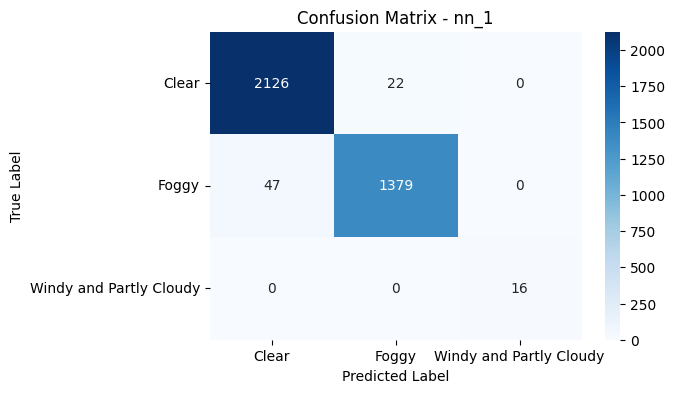

Epoch 1/20
449/449 [==============================] - 7s 8ms/step - loss: 3.8113 - accuracy: 0.7769
Epoch 2/20
449/449 [==============================] - 1s 3ms/step - loss: 0.2948 - accuracy: 0.9005
Epoch 3/20
449/449 [==============================] - 2s 4ms/step - loss: 0.4112 - accuracy: 0.8945
Epoch 4/20
449/449 [==============================] - 2s 5ms/step - loss: 0.2153 - accuracy: 0.9344
Epoch 5/20
449/449 [==============================] - 2s 4ms/step - loss: 0.2081 - accuracy: 0.9378
Epoch 6/20
449/449 [==============================] - 1s 3ms/step - loss: 0.2049 - accuracy: 0.9447
Epoch 7/20
449/449 [==============================] - 1s 3ms/step - loss: 0.2238 - accuracy: 0.9453
Epoch 8/20
449/449 [==============================] - 1s 3ms/step - loss: 0.2009 - accuracy: 0.9540
Epoch 9/20
449/449 [==============================] - 2s 4ms/step - loss: 0.2730 - accuracy: 0.9455
Epoch 10/20
449/449 [==============================] - 2s 5ms/step - loss: 0.2160 - accuracy: 0.9531

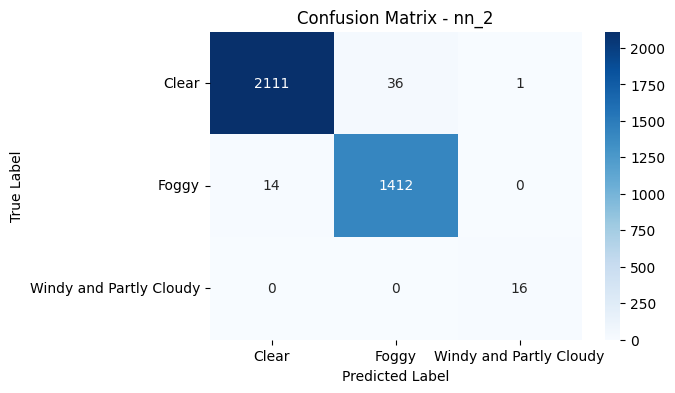

Epoch 1/20
449/449 [==============================] - 3s 3ms/step - loss: 1.4900 - accuracy: 0.8301
Epoch 2/20
449/449 [==============================] - 1s 3ms/step - loss: 0.3557 - accuracy: 0.9081
Epoch 3/20
449/449 [==============================] - 1s 3ms/step - loss: 0.4260 - accuracy: 0.9069
Epoch 4/20
449/449 [==============================] - 2s 4ms/step - loss: 0.2439 - accuracy: 0.9404
Epoch 5/20
449/449 [==============================] - 2s 5ms/step - loss: 0.6813 - accuracy: 0.9136
Epoch 6/20
449/449 [==============================] - 2s 5ms/step - loss: 0.2379 - accuracy: 0.9535
Epoch 7/20
449/449 [==============================] - 1s 3ms/step - loss: 0.3222 - accuracy: 0.9438
Epoch 8/20
449/449 [==============================] - 2s 4ms/step - loss: 0.3469 - accuracy: 0.9418
Epoch 9/20
449/449 [==============================] - 2s 4ms/step - loss: 0.2874 - accuracy: 0.9533
Epoch 10/20
449/449 [==============================] - 3s 6ms/step - loss: 0.2635 - accuracy: 0.9549

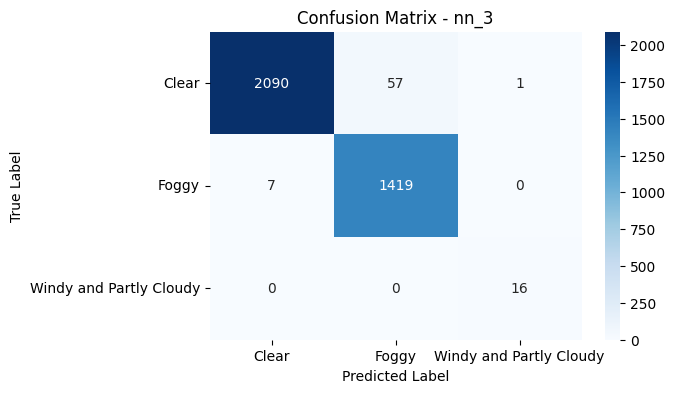

        Model  Accuracy  F1 Score   AUC-ROC AUC-PR
0  logistic_1  0.977437  0.977495  0.997365   None
1  logistic_2  0.978830  0.978879  0.997365   None
2  logistic_3  0.978830  0.978879  0.997365   None
3        rf_1  0.999164  0.999164  0.997365   None
4        rf_2  0.999164  0.999164  0.997365   None
5        rf_3  0.999164  0.999164  0.997365   None
6        nn_1  0.980780  0.980751  0.996809   None
7        nn_2  0.985794  0.985813  0.996299   None
8        nn_3  0.981894  0.981943  0.996702   None


In [77]:
model_names = ['logistic_1', 'logistic_2', 'logistic_3', 'rf_1', 'rf_2', 'rf_3', 'nn_1', 'nn_2', 'nn_3']
models = [
     LogisticRegression(penalty='l2', C=0.5, solver='lbfgs', max_iter=1000),  
     LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000),  
     LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000),  
     RandomForestClassifier(n_estimators=100, random_state=0),  
     RandomForestClassifier(n_estimators=150, random_state=0),  
     RandomForestClassifier(n_estimators=100, random_state=0),  
     Sequential([Dense(units=64, activation='relu', input_dim=8),
                 Dense(units=64, activation='relu'),
                 Dense(units=3, activation='softmax')]),  
     Sequential([Dense(units=64, activation='relu', input_dim=8),
                 Dense(units=64, activation='relu'),
                 Dense(units=3, activation='softmax')]),  
     Sequential([Dense(units=64, activation='relu', input_dim=8),
                 Dense(units=64, activation='relu'),
                 Dense(units=3, activation='softmax')])  
]

# List to store performance metrics for each model
metrics_data = []

# Creating separate DataFrames for each model
dfs = []

# Looping through each model
for model, model_name in zip(models, model_names):
    # Copying the original DataFrame to create a separate DataFrame for each model
    df = data.copy()
    x = df[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', "Wind Bearing (degrees)", 'Visibility (km)', 'Pressure (millibars)']]
    y = df['Summary']

    # Spliting the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    # Feature scaling if applicable (except for deep learning models)
    if not isinstance(model, Sequential):
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
    else:
        x_train_scaled, x_test_scaled = x_train, x_test

    # Training the model
    if not isinstance(model, Sequential):
        model.fit(x_train_scaled, y_train)
    else:
        # For deep learning models, encoding labels and compiling the model before training
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(x_train_scaled, y_train_encoded, epochs=20, batch_size=32)

    # Predicting labels for the test data
    if not isinstance(model, Sequential):
        y_pred = model.predict(x_test_scaled)
        # For deep learning models, decoding the labels
        if isinstance(model, Sequential):
            y_pred = model.predict(x_test_scaled)
            y_pred = y_pred.argmax(axis=1)
            y_pred = le.inverse_transform(y_pred.astype(int))
    else:
        y_pred_prob = model.predict(x_test_scaled)
        y_pred = y_pred_prob.argmax(axis=1)
        y_pred = le.inverse_transform(y_pred.astype(int))

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculating other performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

    # Calculating AUC-PR for binary classification models only
    if len(le.classes_) == 2:
        precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:, 1], pos_label=le.classes_[1])
        auc_pr = average_precision_score(y_test, y_pred_prob[:, 1], average='weighted')
    else:
        auc_pr = None

    # Appending performance metrics to the list
    metrics_data.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1, 'AUC-ROC': auc_roc, 'AUC-PR': auc_pr})

    # Printing the performance metrics for the current model
    print(f'{model_name} - Accuracy:', accuracy)
    print(f'{model_name} - F1 Score:', f1)
    print(f'{model_name} - Confusion Matrix:')
    print(cm)

    # Appending the DataFrame to the list
    dfs.append(df)

    # Ploting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Creating a DataFrame to display the performance metrics
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)
